<a href="https://colab.research.google.com/github/annsyj94/Prediction-of-water-quality-/blob/main/Water_Quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns

#Read the csv 
wq = pd.read_csv('https://raw.githubusercontent.com/annsyj94/Prediction-of-water-quality-/main/water_potability.csv')
wq.head(10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [26]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


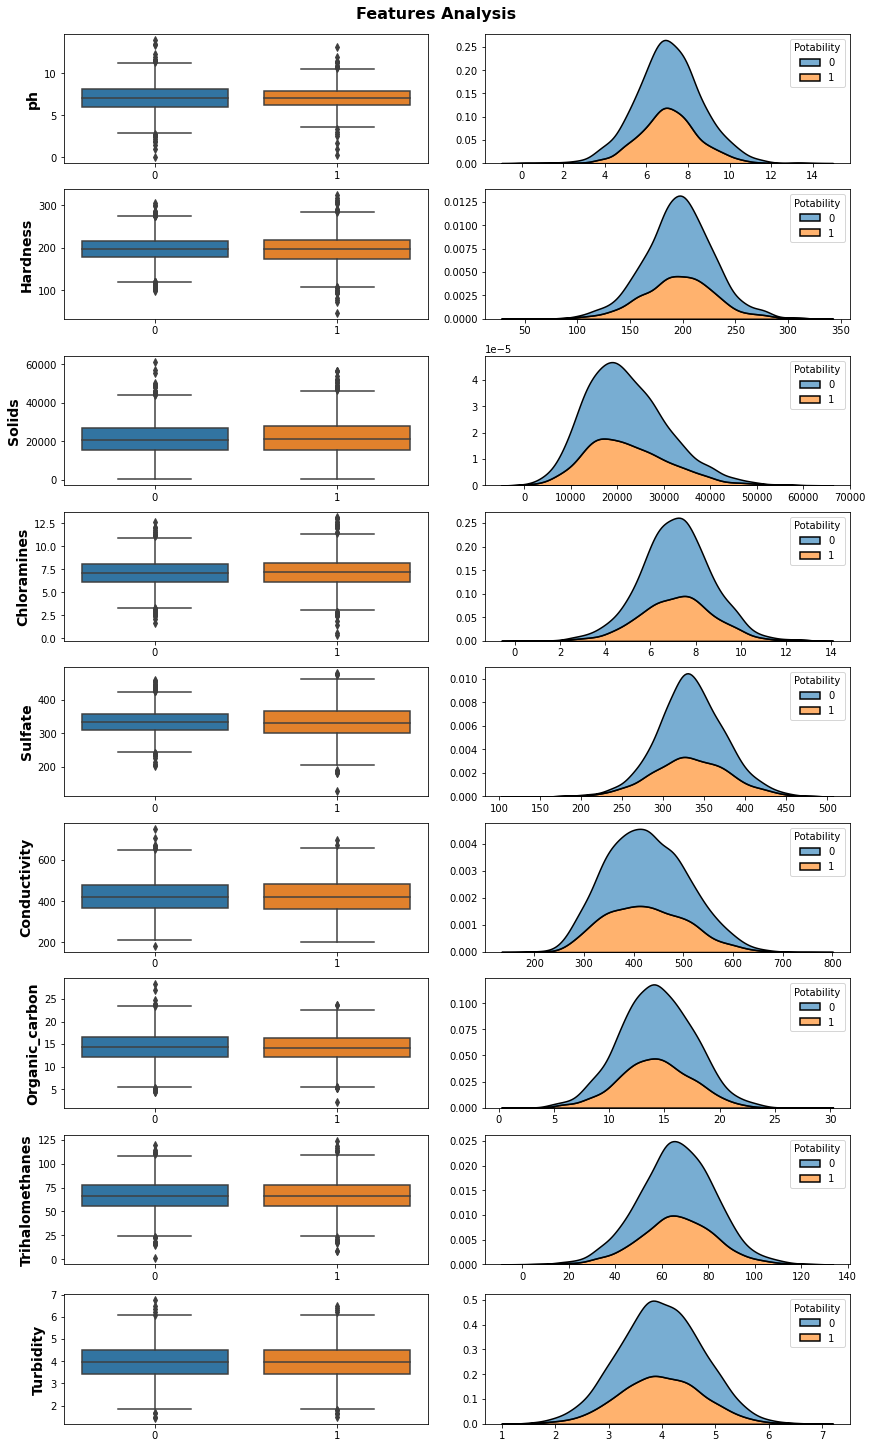

In [27]:
#Features Analysis 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

numeric_col = wq.select_dtypes(float).columns.to_list()


fig, ax = plt.subplots(9, 2, figsize=(12,20), constrained_layout = True)

for i, col in enumerate(numeric_col):
    sns.boxplot(x = 'Potability', y = col, data = wq, ax = ax[i][0])
    
    sns.kdeplot(x = col, hue = 'Potability', fill = True, multiple = 'stack',
                alpha = 0.6, linewidth = 1.5, data = wq, ax = ax[i][1])
    ax[i][0].set_xlabel(None)
    ax[i][0].set_ylabel(col, size = 14, weight = 'bold')
    ax[i][1].set_xlabel(None)
    ax[i][1].set_ylabel(None)
    
fig.suptitle('Features Analysis', size = 16, weight = 'bold');



[Text(0, 0.5, 'ph'),
 Text(0, 1.5, 'Hardness'),
 Text(0, 2.5, 'Solids'),
 Text(0, 3.5, 'Chloramines'),
 Text(0, 4.5, 'Sulfate'),
 Text(0, 5.5, 'Conductivity'),
 Text(0, 6.5, 'Organic_carbon'),
 Text(0, 7.5, 'Trihalomethanes'),
 Text(0, 8.5, 'Turbidity')]

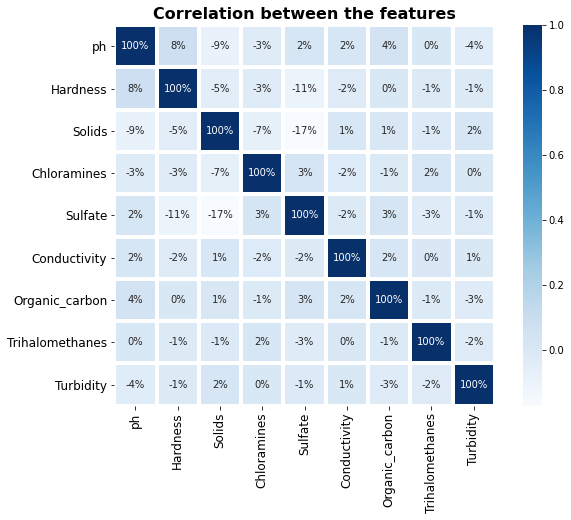

In [80]:
# Corrleation between numeric variables 
fig = plt.figure(figsize = (10,7))

axis = sns.heatmap(wq[numeric_col].corr(), annot = True, linewidths=3, square=True, cmap = "Blues", fmt=".0%")
axis.set_title('Correlation between the features', fontsize=16, weight='bold',y=1.05)
axis.set_xticklabels(numeric_col,fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


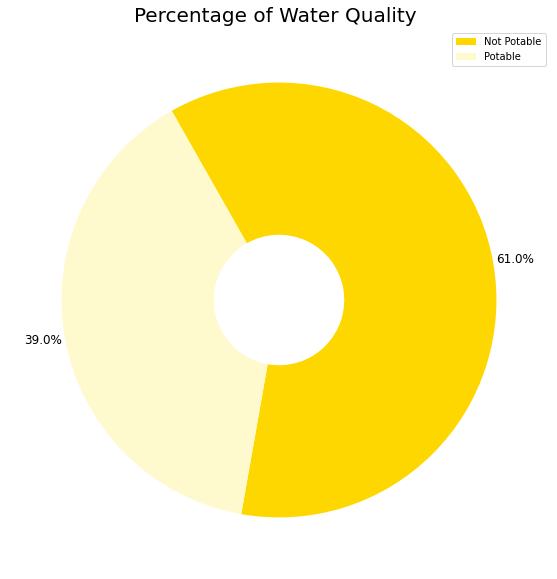

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline 

pob = wq['Potability']
pob_2 = pd.DataFrame(pob.value_counts())


plt.figure(figsize=(10,10))

#Create a pie chart 


plt.pie (pob_2, autopct = '%1.1f%%', startangle=260, pctdistance=1.1, labeldistance=1.2, wedgeprops=dict(width=0.7), colors=['gold','lemonchiffon']
        , textprops = {'fontsize':12})
plt.legend(["Not Potable","Potable"])
plt.title("Percentage of Water Quality ", fontsize=20)
plt.show()

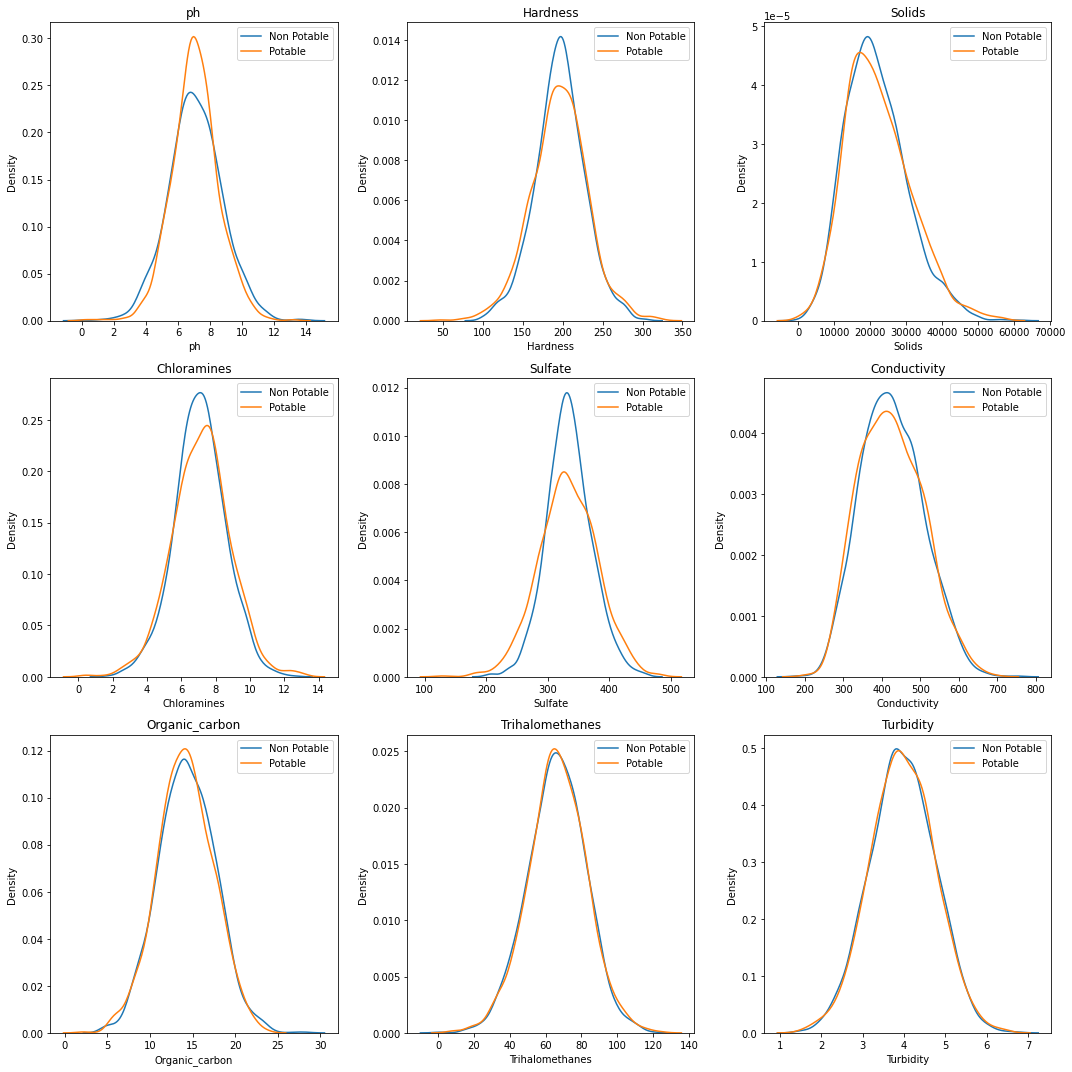

In [30]:
non_potable = wq.query("Potability == 0")
potable = wq.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax, col in enumerate(wq.columns[:9]):
  plt.subplot(3,3, ax+1)
  plt.title(col)
  sns.kdeplot(x = non_potable[col], label = "Non Potable")
  sns.kdeplot(x = potable[col], label = "Potable")
  plt.legend()
plt.tight_layout()

In [58]:
#Normalize attribute values: 
from sklearn.preprocessing import MinMaxScaler

data = wq.drop("Potability", axis = 1)
target = wq['Potability']

min_max_scaler = preprocessing.MinMaxScaler()
train_scale = min_max_scaler.fit_transform(data)

print(train_scale)

[[       nan 0.57113901 0.33609646 ... 0.31340165 0.69975313 0.28609102]
 [0.26543429 0.29740043 0.30061142 ... 0.49731851 0.4509993  0.57679264]
 [0.57850887 0.64131081 0.32161885 ... 0.56201674 0.5328657  0.30363656]
 ...
 [0.67282217 0.46548556 0.53910122 ... 0.33866167 0.56065454 0.34956996]
 [0.36619735 0.66440723 0.19148981 ... 0.34363779 0.62265916 0.61611996]
 [0.56247653 0.53563505 0.28048408 ... 0.5341137  0.63247754 0.16244074]]


In [66]:
#Split train and test datasets 
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.preprocessing import StandardScaler  

train_input,test_input,train_target,test_target = train_test_split(train_scale,target, test_size=0.3)
train_target = train_target.astype(np.float32)
test_target = test_target.astype(np.float32)

scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
test_input = scaler.transform(test_input)

In [77]:
# Using LGBMClassifier 
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_validate 
import numpy as np 

lm = LGBMClassifier(random_state=42)
scores = cross_validate(lm, train_input, train_target, return_train_score=True, n_jobs=-1)

print("Train Accuracy:", np.mean (scores['train_score']))
print("Test Accuracy:", np.mean(scores['test_score']))

Train Accuracy: 0.9949845337390318
Test Accuracy: 0.6411041660720572


In [71]:
#Build neural network model with a sequential model 

from keras.models import Sequential 
from keras.layers import Dropout 
from keras.layers import Dense 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(9,)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_input, train_target, epochs=10, validation_data=(test_input, test_target), verbose=2)

Epoch 1/10
72/72 - 16s - loss: nan - accuracy: 0.6031 - val_loss: nan - val_accuracy: 0.6277
Epoch 2/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 3/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 4/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 5/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 6/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 7/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 8/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 9/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277
Epoch 10/10
72/72 - 0s - loss: nan - accuracy: 0.6023 - val_loss: nan - val_accuracy: 0.6277


In [73]:
from keras.models import load_model 

model.save('water.h5')

In [74]:
water_model = load_model('water.h5')
print('Success')

Success
